In [1]:
import pandas as pd
import plotly.express as px

In [3]:
df = pd.read_csv("data/pokemon.csv")
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [4]:
df.describe()

# What is our objective?

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [10]:
df_legendary = df[df["Legendary"] == True]
df_legendary.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,470.215385,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231
std,173.651095,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262
min,144.000000,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000
25%,381.000000,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000
50%,483.000000,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000
75%,642.000000,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000
max,721.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000


In [11]:
df_non_legendary = df[~df["Legendary"] == True]
df_non_legendary.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000
mean,353.315646,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354
std,208.590419,106.760417,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038,1.673471
min,1.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,175.500000,324.000000,50.000000,54.500000,50.000000,45.000000,50.000000,45.000000,2.000000
50%,346.000000,425.000000,65.000000,72.000000,66.000000,65.000000,65.000000,64.000000,3.000000
75%,533.500000,498.000000,79.500000,95.000000,85.000000,85.000000,85.000000,85.000000,5.000000
max,715.000000,700.000000,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000,6.000000


# 每项属性前十的宝可梦

In [14]:
# We would like to study non-legendary pokemons

# The top-10 attack pokemons
top_attack = df_non_legendary.sort_values(by="Attack",ascending=False)[:10]
top_attack

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
232,214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
494,445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
527,475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
387,354,BanetteMega Banette,Ghost,NaN,555,64,165,75,93,83,75,3,False
454,409,Rampardos,Rock,NaN,495,97,165,60,65,50,58,4,False
268,248,TyranitarMega Tyranitar,Rock,Dark,700,100,164,150,95,120,71,2,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
279,257,BlazikenMega Blaziken,Fire,Fighting,630,80,160,80,130,80,100,3,False
137,127,PinsirMega Pinsir,Bug,Flying,600,65,155,120,65,90,105,1,False
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False


In [16]:
# The top-10 special attack pokemons
top_sp_attack = df_non_legendary.sort_values(by="Sp. Atk",ascending=False)[:10]
top_sp_attack

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
71,65,AlakazamMega Alakazam,Psychic,NaN,590,55,50,65,175,95,150,1,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
196,181,AmpharosMega Ampharos,Electric,Dragon,610,90,95,105,165,110,45,2,False
306,282,GardevoirMega Gardevoir,Psychic,Fairy,618,68,85,65,165,135,100,3,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
750,681,AegislashBlade Forme,Steel,Ghost,520,60,150,50,150,50,60,6,False
275,254,SceptileMega Sceptile,Grass,Dragon,630,70,110,75,145,85,145,3,False
354,323,CameruptMega Camerupt,Fire,Ground,560,70,120,100,145,105,20,3,False
670,609,Chandelure,Ghost,Fire,520,60,55,90,145,90,80,5,False
248,229,HoundoomMega Houndoom,Dark,Fire,600,75,90,90,140,90,115,2,False


In [17]:
# The top-10 defense pokemons
top_defense = df_non_legendary.sort_values(by="Defense",ascending=False)[:10]
top_defense

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
223,208,Steelix,Steel,Ground,510,75,85,200,55,65,30,2,False
789,713,Avalugg,Ice,NaN,514,95,117,184,44,46,28,6,False
332,306,Aggron,Steel,Rock,530,70,110,180,60,60,50,3,False
98,91,Cloyster,Water,Ice,525,50,95,180,85,45,70,1,False
87,80,SlowbroMega Slowbro,Water,Psychic,590,95,75,180,130,80,30,1,False
456,411,Bastiodon,Rock,Steel,495,60,52,168,47,138,30,4,False
103,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False


In [18]:
# The top-10 special defense pokemons
top_sp_defense = df_non_legendary.sort_values(by="Sp. Def",ascending=False)[:10]
top_sp_defense

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
739,671,Florges,Fairy,NaN,552,78,65,68,112,154,75,6,False
751,681,AegislashShield Forme,Steel,Ghost,520,60,50,150,50,150,60,6,False
528,476,Probopass,Rock,Steel,525,60,55,145,75,150,40,4,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
773,703,Carbink,Rock,Fairy,500,50,50,150,50,150,50,6,False
244,226,Mantine,Water,Flying,465,65,40,70,80,140,70,2,False
456,411,Bastiodon,Rock,Steel,495,60,52,168,47,138,30,4,False
529,477,Dusknoir,Ghost,NaN,525,45,100,135,65,135,45,4,False
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


In [20]:
# The top-10 hp pokemons
top_hp = df_non_legendary.sort_values(by="HP",ascending=False)[:10]
top_hp

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False
217,202,Wobbuffet,Psychic,NaN,405,190,33,58,33,58,33,2,False
351,321,Wailord,Water,NaN,500,170,90,45,90,45,60,3,False
655,594,Alomomola,Water,NaN,470,165,75,80,40,45,65,5,False
155,143,Snorlax,Normal,NaN,540,160,110,65,65,110,30,1,False
473,426,Drifblim,Ghost,Flying,498,150,80,44,90,54,80,4,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
321,297,Hariyama,Fighting,NaN,474,144,120,60,40,60,50,3,False
45,40,Wigglytuff,Normal,Fairy,435,140,70,45,85,50,45,1,False


# 各属性的宝可梦均值

In [23]:
# First we need to know what types of pokemon do we have.
types_list = df_non_legendary["Type 1"].unique().tolist()
types_list

['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

In [24]:
# How many types of pokemon are there?
type_count = len(types_list)
type_count

18

In [29]:
# How many pokemons are there for each type?
pokemon_type_count = df_non_legendary.groupby("Type 1").count()["#"]
pokemon_type_count

Type 1
Bug          69
Dark         29
Dragon       20
Electric     40
Fairy        16
Fighting     27
Fire         47
Flying        2
Ghost        30
Grass        67
Ground       28
Ice          22
Normal       96
Poison       28
Psychic      43
Rock         40
Steel        23
Water       108
Name: #, dtype: int64

In [32]:
#How about if I want to sort them in descending order?
pokemon_type_count_sorted = pokemon_type_count.sort_values(ascending=False)
pokemon_type_count_sorted

Type 1
Water       108
Normal       96
Bug          69
Grass        67
Fire         47
Psychic      43
Rock         40
Electric     40
Ghost        30
Dark         29
Poison       28
Ground       28
Fighting     27
Steel        23
Ice          22
Dragon       20
Fairy        16
Flying        2
Name: #, dtype: int64

In [38]:
pokemon_type_average = df_non_legendary.groupby("Type 1").mean()[["Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]]
pokemon_type_average

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Bug,378.927536,56.884058,70.971014,70.724638,53.869565,64.797101,61.681159
Dark,432.344828,64.655172,86.862069,68.689655,70.620690,67.827586,73.689655
Dragon,476.850000,72.650000,103.400000,78.150000,72.900000,77.400000,72.350000
Electric,429.750000,57.325000,66.125000,65.425000,86.275000,72.325000,82.275000
Fairy,396.500000,70.875000,57.187500,63.875000,75.250000,83.875000,45.437500
Fighting,416.444444,69.851852,96.777778,65.925926,53.111111,64.703704,66.074074
Fire,442.127660,67.085106,82.191489,64.531915,86.000000,69.042553,73.276596
Flying,390.000000,62.500000,50.000000,57.500000,71.000000,60.000000,89.000000
Ghost,423.533333,58.733333,71.366667,79.266667,77.300000,74.233333,62.633333


In [40]:
pokemon_type_average_sorted = pokemon_type_average.sort_values(by="Total",ascending = False)
pokemon_type_average_sorted

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,,
Dragon,476.850000,72.650000,103.400000,78.150000,72.900000,77.400000,72.350000
Steel,466.434783,60.434783,92.086957,126.652174,61.217391,76.304348,49.739130
Fire,442.127660,67.085106,82.191489,64.531915,86.000000,69.042553,73.276596
Rock,437.625000,65.125000,89.925000,97.125000,60.125000,71.775000,53.550000
Dark,432.344828,64.655172,86.862069,68.689655,70.620690,67.827586,73.689655
Electric,429.750000,57.325000,66.125000,65.425000,86.275000,72.325000,82.275000
Ghost,423.533333,58.733333,71.366667,79.266667,77.300000,74.233333,62.633333
Psychic,423.000000,67.720930,54.953488,61.000000,88.302326,80.674419,70.348837
Water,421.398148,71.120370,72.777778,71.990741,72.305556,68.175926,65.027778


In [47]:
# Draw a barchart for the Total column

total_average_bar = px.bar(pokemon_type_average_sorted["Total"])
total_average_bar.show()

In [48]:
# Excecise: Draw a barchart for the Attack column using the df above.

attack_average_bar = px.bar(pokemon_type_average_sorted["Attack"])
attack_average_bar.show()

In [49]:
# Can I plot the chart above in a sorted way?

type_attack_sorted = pokemon_type_average.sort_values(by="Attack",ascending=False)
attack_average_sorted_bar = px.bar(type_attack_sorted["Attack"])
attack_average_sorted_bar.show()

In [64]:
#How can I have a chart with a better look?

formatted_aasb = px.bar(
    type_attack_sorted["Attack"],
    template="ggplot2",
    title="Average attack value of each type of pokemon",
    labels={
        "value":"Attack","Type 1":"Type"
    }
)
formatted_aasb.show()

In [65]:
# How can I make the chart above even more informative?

average_attack = type_attack_sorted["Attack"].mean()
formatted_aasb.add_shape( # add a horizontal "average" line
    type="line", line_color="red", line_width=3, opacity=1, line_dash="dot",
    x0=0, x1=1, xref="paper", y0=average_attack, y1=average_attack, yref="y"
)
formatted_aasb.add_annotation( # add a text callout with arrow
    text="average line", x="Bug", y=average_attack+2, arrowhead=1, showarrow=True
)

formatted_aasb.show()

# You can try to search for other propertyies by looking up: https://plotly.com/python/styling-plotly-express/

# 各属性各项均值

In [72]:
# plot pokemon_type_average_sorted

type_average_bar = px.bar(
    pokemon_type_average_sorted.drop(columns=["Total"]),
    template="ggplot2",
    barmode="group",
    labels={
        "value":"Attack","Type 1":"Type"
    },
    title="Average value for each attribute grouped by type"    
)
type_average_bar.show()

In [79]:
# The variance of different attributes of each type

type_cleaned_df = pokemon_type_average_sorted.drop(columns=["Total"])
type_variance = type_cleaned_df.var(axis=1)
type_variance_sorted = type_variance.sort_values()
type_variance_sorted
# We can notice the diffence in variance of different types

Type 1
Water         9.194870
Ice          19.080785
Poison       24.543197
Grass        32.214896
Bug          49.760442
Dark         61.586524
Ghost        67.614963
Normal       71.474801
Fire         74.615241
Electric    120.343000
Dragon      143.808750
Psychic     152.026339
Flying      184.900000
Fairy       186.758854
Fighting    212.052126
Ground      219.200340
Rock        295.206437
Steel       791.362571
dtype: float64

# 各项属性关联

In [104]:
# Correlation between attributes
df_corr = df_non_legendary.drop(columns=["#","Legendary","Generation"]).corr()
df_corr

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Total,1.000000,0.586473,0.699817,0.608721,0.685697,0.698582,0.520161
HP,0.586473,1.000000,0.377668,0.192426,0.299471,0.337606,0.109847
Attack,0.699817,0.377668,1.000000,0.437192,0.261879,0.211872,0.305346
Defense,0.608721,0.192426,0.437192,1.000000,0.186030,0.475241,-0.040796
Sp. Atk,0.685697,0.299471,0.261879,0.186030,1.000000,0.471164,0.393205
Sp. Def,0.698582,0.337606,0.211872,0.475241,0.471164,1.000000,0.212542
Speed,0.520161,0.109847,0.305346,-0.040796,0.393205,0.212542,1.000000


In [105]:
heat_corr = px.imshow(df_corr)
heat_corr.show()

In [126]:
# 3D scatter plot of Attack, Sp. Atk, and HP

df_3d_ash = df_non_legendary[["Name","Type 1","HP","Attack","Sp. Atk"]]
ash_3d_plot = px.scatter_3d(
    df_3d_ash, 
    x='Attack', 
    y='Sp. Atk', 
    z='HP',
    color='Type 1',
    hover_name='Name',
    size=[1 for s in df_non_legendary["Name"].tolist()],
    size_max=5)
ash_3d_plot.show()

In [140]:
# A refined version
# We take Atk, Sp. Atk, and Speed as x, y, z, and take HP as size, the fourth dimension.
# What's more, we will map the color according to the color used in the game.

df_4d_assh = df_non_legendary[["Name","Type 1","HP","Attack","Sp. Atk","Speed"]]
assh_4d_plot = px.scatter_3d(
    df_4d_assh,
    title="Pokemons",
    x='Attack', 
    y='Sp. Atk', 
    z='Speed',
    color='Type 1',
    hover_name='Name',
    size="HP",
    size_max=15,
    height=1000,
    color_discrete_sequence=[
        "green",
        "red",
        "blue",
        "#DEB887",
        "grey",
        "#8B008B",
        "gold",
        "olive",
        "#C71585",
        "brown",
        "crimson",
        "#B8860B",
        "indigo",
        "aqua",
        "#000080",
        "#2F4F4F",
        "#C0C0C0",
        "#D8BFD8"
    ]
)
assh_4d_plot.show()


# Can we add a filter on this plot?
# Honestly, I have not yet found an api to add filter directly, but since plotly is embedded in dash, so we can use dash do add filters in any way!

# 机器学习

In [146]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [192]:
# Predict legendary or non_legendary with given properties
# We first need to code the categorical feature into multiple binary features.

df_ml = df.drop(columns=["#","Generation"])
def is_type(Type, type):
    if Type == type:
        return 1
    else:
        return 0
for type in types_list:
    df_ml[f"{type}_1"] = df_ml["Type 1"].apply(lambda x: is_type(x, type))
    df_ml[f"{type}_2"] = df_ml["Type 2"].apply(lambda x: is_type(x, type))
df_ml

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Ice_1,Ice_2,Dragon_1,Dragon_2,Dark_1,Dark_2,Steel_1,Steel_2,Flying_1,Flying_2
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,0,0,0,0,0,0,0,0,0,0
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,0,0,0,0,0,0,0,0,0,0
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,0,0,0,0,0,0,0,0,0,0
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,...,0,0,0,0,0,0,0,0,0,0
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,600,50,100,150,100,150,50,...,0,0,0,0,0,0,0,0,0,0
796,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,...,0,0,0,0,0,0,0,0,0,0
797,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,...,0,0,0,0,0,0,0,0,0,0
798,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,...,0,0,0,0,0,1,0,0,0,0


In [198]:
# Split dataset in features and target variable


X = df_ml.drop(columns = ['Name','Type 1','Type 2','Legendary'])
y = df_ml["Legendary"]

In [199]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [214]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [215]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9166666666666666


[Text(496.0, 860.7, 'Total <= 573.5\ngini = 0.145\nsamples = 560\nvalue = [516, 44]'),
 Text(434.0, 770.1, 'gini = 0.0\nsamples = 484\nvalue = [484, 0]'),
 Text(558.0, 770.1, 'Total <= 650.0\ngini = 0.488\nsamples = 76\nvalue = [32, 44]'),
 Text(310.0, 679.5, 'Total <= 585.0\ngini = 0.49\nsamples = 49\nvalue = [28, 21]'),
 Text(124.0, 588.9000000000001, 'Attack <= 117.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(62.0, 498.3, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(186.0, 498.3, 'HP <= 85.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(124.0, 407.70000000000005, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(248.0, 407.70000000000005, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(496.0, 588.9000000000001, 'Dragon_1 <= 0.5\ngini = 0.382\nsamples = 35\nvalue = [26, 9]'),
 Text(434.0, 498.3, 'HP <= 52.5\ngini = 0.305\nsamples = 32\nvalue = [26, 6]'),
 Text(372.0, 407.70000000000005, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(496.0, 407.70000000000

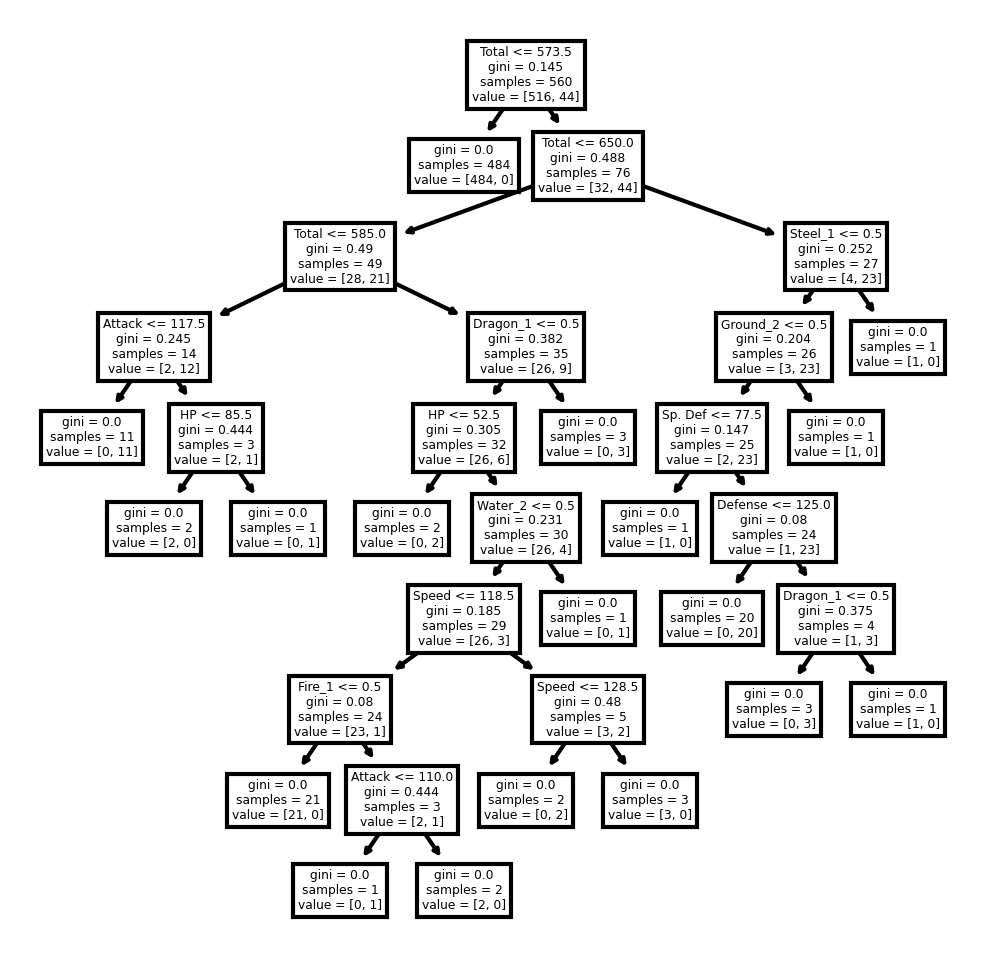

In [216]:
# Visualize decision tree

import matplotlib.pyplot as plt
from sklearn import tree

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

tree.plot_tree(clf,
              feature_names = X.columns.to_list()
)

In [217]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9375


[Text(348.75, 792.75, 'Total <= 573.5\nentropy = 0.397\nsamples = 560\nvalue = [516, 44]'),
 Text(232.5, 566.25, 'entropy = 0.0\nsamples = 484\nvalue = [484, 0]'),
 Text(465.0, 566.25, 'Total <= 650.0\nentropy = 0.982\nsamples = 76\nvalue = [32, 44]'),
 Text(232.5, 339.75, 'Attack <= 129.5\nentropy = 0.985\nsamples = 49\nvalue = [28, 21]'),
 Text(116.25, 113.25, 'entropy = 0.987\nsamples = 37\nvalue = [16, 21]'),
 Text(348.75, 113.25, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(697.5, 339.75, 'Sp. Atk <= 125.0\nentropy = 0.605\nsamples = 27\nvalue = [4, 23]'),
 Text(581.25, 113.25, 'entropy = 0.918\nsamples = 12\nvalue = [4, 8]'),
 Text(813.75, 113.25, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]')]

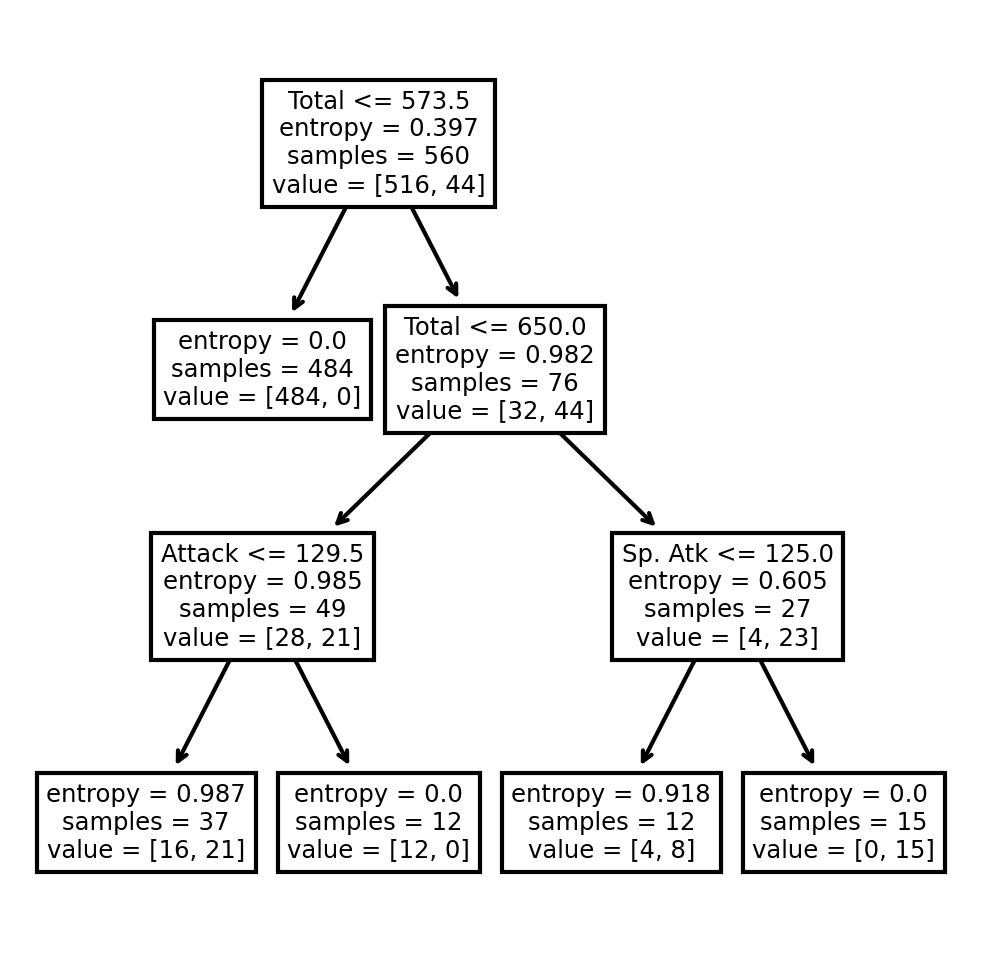

In [219]:
fig_refined, axes_refined = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,feature_names = X.columns.to_list())

In [ ]:
# The Zen of Python

# Beautiful is better than ugly.

# Explicit is better than implicit.

# Simple is better than complex.

# Complex is better than complicated.

# Flat is better than nested.

# Sparse is better than dense.

# Readability counts.

# Special cases aren't special enough to break the rules.

# Although practicality beats purity.

# Errors should never pass silently.

# Unless explicitly silenced.

# In the face of ambiguity, refuse the temptation to guess.

# There should be one-- and preferably only one --obvious way to do it.

# Although that way may not be obvious at first unless you're Dutch.

# Now is better than never.

# Although never is often better than *right* now.

# If the implementation is hard to explain, it's a bad idea.

# If the implementation is easy to explain, it may be a good idea.

# Namespaces are one honking great idea -- let's do more of those!